In [41]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv('global_covid_confirmed_daily_updates.csv')
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532
1,Albania,0,0,0,0,0,0,0,0,0,...,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788
2,Algeria,0,0,0,0,0,0,0,0,0,...,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385
3,Andorra,0,0,0,0,0,0,0,0,0,...,852,852,852,853,853,853,853,854,854,855
4,Angola,0,0,0,0,0,0,0,0,0,...,96,113,118,130,138,140,142,148,155,166


## Transposing data

In [43]:
df = df.T
country = df.iloc[0].to_list()
df.columns = country
df = df.drop('Country/Region')
print(df)

        Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda  \
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   
...             ...     ...     ...     ...    ...                 ...   
6/14/20       24766    1521   10919     853    140                  26   
6/15/20       25527    1590   11031     853    142                  26   
6/16/20       26310    1672   11147     854    148                  26   
6/17/20       26874    1722   11268     854    155                  26   
6/18/20       27532    1788   11385     855    166                  26   

        Argentina Armenia Australia Austria  ... United Kingdom Uruguay  \
1/22/20         0       0         0 

## converting transposed data into dataframe

In [44]:
df = pd.DataFrame(df, dtype='float64')
df.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


## converting index to 'Datatime index' for time series analysis

In [45]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18'],
              dtype='datetime64[ns]', length=149, freq=None)

## datetime frequency to 'Daily' data

In [46]:
df.index.freq = 'D'
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18'],
              dtype='datetime64[ns]', length=149, freq='D')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 2020-01-22 to 2020-06-18
Freq: D
Columns: 188 entries, Afghanistan to Zimbabwe
dtypes: float64(188)
memory usage: 220.0 KB


In [48]:
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18'],
              dtype='datetime64[ns]', length=149, freq='D')

In [49]:
df.dropna(inplace=True)

In [50]:
df.shape

(149, 188)

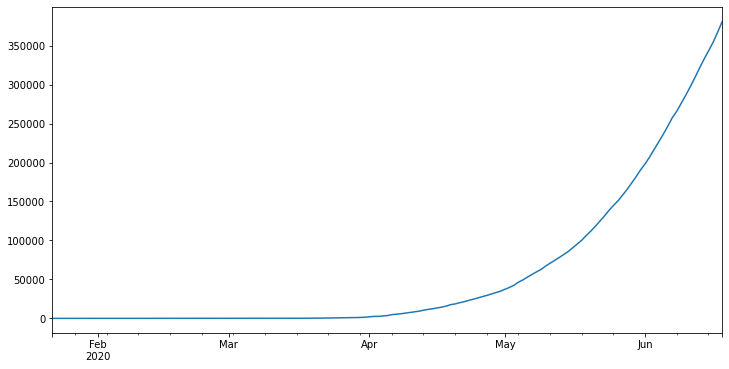

In [54]:
df['India'].plot(figsize = (12,6))

In [55]:
len(df)

149

## Splitting data to train & test set

In [59]:
train = df.iloc[:120]
test = df.iloc[120:]

In [60]:
len(test)

29

In [61]:
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

## Augmented Dickey-Fuller Test

Let's make a custom function to perform Augmented Dickey-Fuller test and check whether the data is stationary or not

In [62]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [76]:
adf_test(df['India'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.658241
p-value                   0.000101
# lags used              14.000000
# observations          134.000000
critical value (1%)      -3.480119
critical value (5%)      -2.883362
critical value (10%)     -2.578407
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


## *As we can see that the data is stationary, we can apply ARIMA model to this data.*

In [77]:
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

## auto_arima
In order to fit ARIMA model we have to find suitable p, d & q term. In order to do that we will use 'auto_arima' funtion from pmdarima (pyramid arima) library. It is very similar to 'grid search' we use in ML to find out suitable hyperparameters. Here, p, d, q terms are also like hyperparameters.

In [78]:
stepwise_fit = auto_arima(df['India'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=1,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=2246.816, BIC=2252.797, Time=0.025 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=2233.606, BIC=2242.577, Time=0.071 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=2228.860, BIC=2237.831, Time=0.302 seconds
Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=False]; AIC=2249.803, BIC=2252.793, Time=0.015 seconds
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=2230.814, BIC=2242.776, Time=0.446 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=2230.918, BIC=2242.879, Time=0.288 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=2226.309, BIC=2241.261, Time=0.561 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.729 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  149
Model:               SARIMAX(1, 2, 2)   Log Likelihood               -1108.154
Date:                Tue, 23 Jun 2020   AIC                           2226.309
Time:                        01:29:06   BIC                           2241.261
Sample:                             0   HQIC                          2232.384
                                - 149                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    166.5880     51.918      3.209      0.001      64.831     268.345
ar.L1         -0.8843      0.041    -21.677      0.000      -0.964      -0.804
ma.L1          0.5635      0.925      0.609      0.543      -1.250       2.377
ma.L2         -0.4361      0.423     -1.031      0.303      -1.265       0.393
sigma2      2.035e+05   1.84e+05      1.104      0.269   -1.58e+05    5.65e+05
===================================================================================
Ljung-Box (Q):                      106.86   Jarque-Bera (JB):                81.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              24.59   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Let's fit the ARIMA model with obtained order for the model

In [79]:
model = ARIMA(train['India'],order=(1,2,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.India   No. Observations:                  118
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -832.796
Method:                       css-mle   S.D. of innovations            280.014
Date:                Tue, 23 Jun 2020   AIC                           1675.592
Time:                        01:30:01   BIC                           1689.446
Sample:                    01-24-2020   HQIC                          1681.217
                         - 05-20-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             54.7358     26.781      2.044      0.041       2.245     107.226
ar.L1.D2.India     0.6852      0.128      5.365      0.000       0.435       0.936
ma.L1.D2.India    -1.3144      0.143     -9.173      0.000      -1.595      -1.034
ma.L2.D2.India     0.6439      0.124      5.175      0.000       0.400       0.888
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4594           +0.0000j            1.4594            0.0000
MA.1            1.0206           -0.7151j            1.2462           -0.0973
MA.2            1.0206           +0.7151j            1.2462            0.0973
-----------------------------------------------------------------------------
"""

In [68]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,2,2) Predictions')

In [69]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['India'][i]}")

predicted=118047.4468, expected=118226.0
predicted=124313.2577, expected=124794.0
predicted=130765.1128, expected=131423.0
predicted=137361.6793, expected=138536.0
predicted=144074.635 , expected=144950.0
predicted=150884.573 , expected=150793.0
predicted=157778.195 , expected=158086.0
predicted=164746.3889, expected=165386.0
predicted=171782.9106, expected=173491.0
predicted=178883.4819, expected=181827.0
predicted=186045.1708, expected=190609.0
predicted=193265.9685, expected=198370.0
predicted=200544.4986, expected=207191.0
predicted=207879.8177, expected=216824.0
predicted=215271.2795, expected=226713.0
predicted=222718.4412, expected=236184.0
predicted=230220.9993, expected=246622.0
predicted=237778.7458, expected=257486.0
predicted=245391.5382, expected=265928.0
predicted=253059.2789, expected=276146.0
predicted=260781.9011, expected=286605.0
predicted=268559.3588, expected=297535.0
predicted=276391.6206, expected=308993.0
predicted=284278.6651, expected=320922.0
predicted=292220

In [71]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['India'], predictions)
print(f'ARIMA(1,2,2) MSE Error: {error:11.10}')

ARIMA(1,2,2) MSE Error: 595423774.8


In [72]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['India'], predictions)
print(f'ARIMA(1,2,2) RMSE Error: {error:11.10}')

ARIMA(1,2,2) RMSE Error: 24401.30683


In [73]:
model = ARIMA(df['India'],order=(1,2,2))
results = model.fit()
fcast = results.predict(len(df),len(df)+1,typ='levels').rename('ARIMA(1,2,2) Forecast')

## Predicted values in future

In [74]:
fcast

2020-06-19    393303.589772
2020-06-20    405266.630838
Freq: D, Name: ARIMA(1,2,2) Forecast, dtype: float64

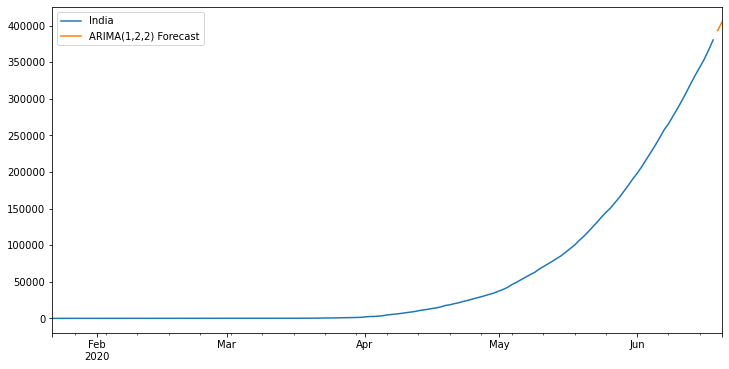

In [75]:
# Plot predictions against known values

ax = df['India'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)